# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [239]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [240]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [241]:
#  1. Get the total rides for each city type
rides_by_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
rides_by_city_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [242]:
# 2. Get the total drivers for each city type

drivers_by_citytype = pyber_data_df.groupby(["type"]).count()["driver_count"]
drivers_by_citytype

type
Rural        125
Suburban     625
Urban       1625
Name: driver_count, dtype: int64

In [243]:
#  3. Get the total amount of fares for each city type
total_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [244]:
#  4. Get the average fare per ride for each city type. 
average_fare_by_citytype = pyber_data_df.groupby(["type"]).mean()["fare"]
average_fare_by_citytype

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [245]:
# 5. Get the average fare per driver for each city type. 
avg_fare_perdriver_citytype = pyber_data_df["fare"].sum() / drivers_by_citytype
avg_fare_perdriver_citytype

type
Rural       508.309120
Suburban    101.661824
Urban        39.100702
Name: driver_count, dtype: float64

In [246]:
#  6. Create a PyBer summary DataFrame. 
new_df = pd.merge(rides_by_city_type, drivers_by_citytype, how="outer", on=["type"])
new_df

new_df2 = pd.merge(average_fare_by_citytype, avg_fare_perdriver_citytype, how="outer", on=["type"])
new_df2

new_df3 = pd.merge(new_df, new_df2, how="outer", on=["type"])
new_df3

pyber_sum_df = pd.merge(avg_fare_perdriver_citytype, new_df3, how="outer", on=["type"])
pyber_sum_df.head()

,driver_count,ride_id,driver_count_x,fare,driver_count_y
type,,,,,
Rural,508.309120,125,125,34.623440,508.309120
Suburban,101.661824,625,625,30.970128,101.661824
Urban,39.100702,1625,1625,24.525772,39.100702


In [247]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_sum_df.index.name = None

In [248]:
#  8. Format the columns.
pyber_summary_df = pyber_sum_df.rename(columns={"ride_id": "Total Rides", "driver_count_x": "Total Drivers", "driver_count": "Average Fare Per Driver", "fare": "Average fare per ride", "blah" : "Average Fare Per Rider", "driver_count_y": "Total Fares"})
pyber_summary_df["Average Fare Per Driver"] = pyber_summary_df["Average Fare Per Driver"].map("${:.2f}".format)
pyber_summary_df["Average fare per ride"] = pyber_summary_df["Average fare per ride"].map("${:.2f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:.2f}".format)
pyber_summary_df

new_column_order = ["Total Rides", "Total Drivers", "Total Fares", "Average fare per ride", "Average Fare Per Driver"]
pyber_summary_df_rd = pyber_summary_df_rd[new_column_order]
pyber_summary_df_rd

,Total Rides,Total Drivers,Total Fares,Average fare per ride,Average Fare Per Driver
Rural,125,125,$508.31,$34.62,$508.31
Suburban,625,625,$101.66,$30.97,$101.66
Urban,1625,1625,$39.10,$24.53,$39.10


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [310]:
# 1. Read the merged DataFrame
new_df4 = pyber_data_df.groupby(["date"]).sum()["fare"]
new_df4

new_df5 = pd.merge(pyber_data_df, new_df4, how="outer", on=["date", "date"])
new_df5

,city,date,fare_x,ride_id,driver_count,type,fare_y
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban,13.83
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban,30.24
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban,33.44
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban,23.44
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban,34.58
...,...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural,13.38
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural,20.76
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural,11.11
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural,44.94


In [312]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
new_df6 = pyber_data_df.groupby(["type"]).sum()["fare"]
new_df6


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [314]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# new_df5 = new_df5.reset_index()
new_df5

,city,date,fare_x,ride_id,driver_count,type,fare_y
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban,13.83
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban,30.24
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban,33.44
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban,23.44
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban,34.58
...,...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural,13.38
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural,20.76
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural,11.11
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural,44.94


In [319]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

pivot = new_df5.pivot_table(index=['date'], values=['fare_y'], columns=["type"])

print (pivot)

                    fare_y                
type                 Rural Suburban  Urban
date                                      
2019-01-01 00:08:16    NaN      NaN  37.91
2019-01-01 00:46:46    NaN    47.74    NaN
2019-01-01 02:07:24    NaN    24.07    NaN
2019-01-01 03:46:50    NaN      NaN   7.57
2019-01-01 05:23:21    NaN      NaN  10.75
...                    ...      ...    ...
2019-05-08 04:20:00    NaN      NaN  21.99
2019-05-08 04:39:49    NaN      NaN  18.45
2019-05-08 07:29:01    NaN      NaN  18.55
2019-05-08 11:38:35    NaN      NaN  19.77
2019-05-08 13:10:18    NaN      NaN  18.04

[2375 rows x 3 columns]


In [332]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
specific_dates_df = pivot.loc[pivot["date"]]


KeyError: 'date'

In [333]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# pivot.index = pivot.to_datetime(pivot.index)

In [334]:
# 7. Check that the datatype for the index is datetime using df.info()
pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (fare_y, Rural)     125 non-null    float64
 1   (fare_y, Suburban)  625 non-null    float64
 2   (fare_y, Urban)     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2+ KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.


In [344]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')



In [349]:
x_axis = ["Feb", "Mar", "April"]

y_axis = [0, 500, 1000]

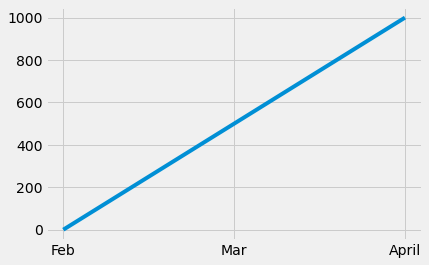

In [350]:
plt.plot(x_axis, y_axis)